In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Calculo de erro em medidas com trena
<p> estimando barriga da trena de 0 a 10 cm no meio </p>
<p> estimando como sendo uma linha reta </p>

<ul>
    <li>Criando funções</li>
    <li>Criando DataFrame</li>
    <li>Utilizando Apply pra criar novas colunas</li>
</ul>

In [4]:
x = [x for x in range(101)]
print(x)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [325]:
dist = 30
alt = 1

### Calculando Coeficientes de uma parábola f(x) = ax²+bx+c

### main matrix

In [7]:
m1 = np.matrix([[0,0,1],[(dist/2)**2,dist/2,1],[(dist*dist),dist,1]])
ma = 

In [44]:
det_m1 = np.linalg.det(m1)

In [30]:
mr= np.matrix([alt,0,alt]).T

In [31]:
mr.shape

(3, 1)

### a matrix 

In [39]:
ma = m1.copy()

replacing first column 

In [40]:
ma[:,0] = mr
ma

matrix([[ 1.,  0.,  1.],
        [ 0., 15.,  1.],
        [ 1., 30.,  1.]])

calculating det 

In [41]:
det_a = np.linalg.det(a)
det_a

-30.000000000000004

calculating a coef

In [45]:
coef_a = det_a /det_m1
coef_a

0.004444444444444447

### b matrix 

In [48]:
mb = m1.copy()
mb[:,1] = mr
mb

matrix([[  0.,   1.,   1.],
        [225.,   0.,   1.],
        [900.,   1.,   1.]])

In [49]:
det_b = np.linalg.det(mb)
det_b

900.0000000000001

In [52]:
coef_b = det_b/det_m1
coef_b

-0.13333333333333341

### c matrix 

In [54]:
mc = m1.copy()
mc[:,2] = mr
mc

matrix([[  0.,   0.,   1.],
        [225.,  15.,   0.],
        [900.,  30.,   1.]])

In [55]:
det_c = np.linalg.det(mc)
det_c

-6749.999999999997

In [58]:
coef_c = det_c/det_m1
coef_c

1.0

In [67]:
def aabc(x):
    return (coef_a*x**2 +coef_b*x +coef_c)

In [129]:
def return_coef (dist_horizontal,alt_error=0.01):
    """
    data distanciância horizontal medida entre os pontos e a altura da barriga, retorna a algura dentro da parabola
    dist= distancia horizontal
    alt_error = altura da barriga no ponto médio
    ps: para plotar no matplot
    
    
    
    
    """
    #1) definindo matriz principal e det_m1
    m1 = np.matrix([[0,0,1],
                    [(dist_horizontal/2)**2,dist/2,1]
                    ,[(dist_horizontal**2),dist_horizontal,1]])
    
    det_m1 = np.linalg.det(m1)
    #2) definindo igualdade
    mr = np.matrix([alt_error,0,alt_error]).T
    
    def return_coef(n):
        """
        return coef dado posição a,b,c
        """
        mx = m1.copy()
        mx[:,n] = mr
        det_x = np.linalg.det(mx)
        return det_x/det_m1
    
    coef_a = return_coef(0)
    coef_b = return_coef(1)
    coef_c = return_coef(2)
  
    
    return (coef_a,coef_b,coef_c)   
    

In [130]:
def return_y (x):
    """
    dado os coeficientes retorna o  y da parabola"""
    a,b,c = return_coef(30)
    
    return (a*x**2 +b*x +c)

In [131]:
y = list(map(return_y,x[:31]))

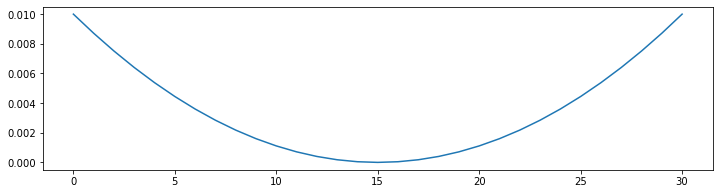

In [326]:
plt.figure(figsize = (12,3))
plt.plot(x[:31],y)

#### Criação da função de erro de curvatura (tamanho da curvatura - real)

### curvature error

In [314]:
curvature(1,0.01)

0.0002666027032094398

In [327]:
def curvature (dist, alt):
    
    m1 = np.matrix([[0,0,1],
                    [(dist/2)**2,dist/2,1]
                    ,[(dist**2),dist,1]])
    
    det_m1 = np.linalg.det(m1)
    
    mr = np.matrix([alt,0,alt]).T
    
    def return_coef(n):
        """
        return coef dado posição a,b,c
        """
        mx = m1.copy()
        mx[:,n] = mr
        det_x = np.linalg.det(mx)
        return det_x/det_m1
    
    a = return_coef(0)
    b = return_coef(1)
    c = return_coef(2)
    
    ea = np.sqrt(((2*a*dist+b)**2+1))
    eb = (2*a*dist+b)
    ec = np.arcsinh(2*a*dist+b)
    ed = 4*a
    
    nea = np.sqrt(((b)**2+1))
    neb=(+b)
    nec = np.arcsinh(b)
    ned = 4*a
    
                 
    
    
    
    error = (ea*eb+ec)/ed- (nea*neb+nec)/ned
    
    
    
    
    return error-dist

  

### estimando erro como retas

In [328]:
def err_hipotenusa(dist,alt):
    return 2*(np.sqrt((dist/2)**2+alt**2))

### Utilizando Apply em 2 colunas

In [165]:
a =np.array([x for x in range(10)])

In [172]:
b = 2*a

In [184]:
d_ab = {'a':a,'b':b}

In [188]:
df_ab = pd.DataFrame(d_ab)
df_ab

,a,b
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8
5,5,10
6,6,12
7,7,14
8,8,16
9,9,18


In [191]:
def a_b(x):
    return x[0]+x[1]

In [192]:
df_ab.apply(a_b,axis = 1)

0     0
1     3
2     6
3     9
4    12
5    15
6    18
7    21
8    24
9    27
dtype: int64

# Criação do DataFrame para calcular os erros

<p>dist de 0 a 50m separadas de 5 m</p>
<p>alt do da barriga de 1 a 10 cm separados de 1 cm</p>

In [213]:
dist = [x for x in range(0,51,5)]
alt = [x for x in range(1,11,1)]
dist =dist[1:]

In [234]:
dist_list = []
alt_list = []
for item in range(len(dist)):
    for item_a in range(len(alt)):
        #print(dist[item],alt[item_a])
        dist_list.append(dist[item])
        alt_list.append(alt[item_a])


In [245]:
dist_alt_dict = {'distancia': np.array(dist_list)*100,
                 'altura': alt_list}


In [247]:
df = pd.DataFrame(dist_alt_dict)
df

,distancia,altura
0,500,1
1,500,2
2,500,3
3,500,4
4,500,5
...,...,...
95,5000,6
96,5000,7
97,5000,8
98,5000,9


### erro de curvatura
<p>Criação da função para usar apply </p>
<p> input = df, no processo seleciona as colunas ideais</p>
<p> retorna o valor do erro</p>

In [248]:
def curvature_err (x):
    
    m1 = np.matrix([[0,0,1],
                    [(x[0]/2)**2,x[0]/2,1]
                    ,[(x[0]**2),x[0],1]])
    
    det_m1 = np.linalg.det(m1)
    
    mr = np.matrix([x[1],0,x[1]]).T
    
    def return_coef(n):
        """
        return coef dado posição a,b,c
        """
        mx = m1.copy()
        mx[:,n] = mr
        det_x = np.linalg.det(mx)
        return det_x/det_m1
    
    a = return_coef(0)
    b = return_coef(1)
    c = return_coef(2)
    
    ea = np.sqrt(((2*a*x[0]+b)**2+1))
    eb = (2*a*x[0]+b)
    ec = np.arcsinh(2*a*x[0]+b)
    ed = 4*a
    
    nea = np.sqrt(((b)**2+1))
    neb=(+b)
    nec = np.arcsinh(b)
    ned = 4*a
    
                 
    
    
    
    error = (ea*eb+ec)/ed- (nea*neb+nec)/ned
    
    
    
    
    return error-x[0]

In [250]:
df['erro_curvatura'] = df.apply(curvature_err,axis = 1)

In [259]:
df[df['distancia'] == 500]

,distancia,altura,erro_curvatura
0,500,1,0.005333
1,500,2,0.021333
2,500,3,0.047996
3,500,4,0.085320
4,500,5,0.133301
5,500,6,0.191934
6,500,7,0.261211
7,500,8,0.341124
8,500,9,0.431665
9,500,10,0.532822


In [269]:
df.rename(columns = {'distancia':'distancia_cm',
                     'altura':'altura_cm',
                     'erro_curvatura': 'erro_curvatura_cm'}, inplace = True)

In [276]:
df['distancia_m']=df['distancia_cm']/100

### erro hipotenusa

In [283]:
def err_hipotenusa(x):
    return 2*(np.sqrt((x[0]/2)**2+x[1]**2))-x[0]

In [284]:
df['erro_hipotenusa_cm'] = df.apply(err_hipotenusa,axis= 1)

In [287]:
df['erro_curvatura_cm'].max()

0.5328224999915392

In [289]:
df[df['erro_curvatura_cm'] == df['erro_curvatura_cm'].max()]

,distancia_cm,altura_cm,erro_curvatura_cm,distancia_m,erro_hipotenusa_cm
9,500,10,0.532822,5.0,0.39984


### erro altura

In [291]:
def altura(df):
    return np.sqrt(df[0]**2+df[1]**2)-df[0]

In [294]:
df['erro_altura'] = df.apply(altura,axis = 1)
df[df['erro_altura'] ==df['erro_altura'].max() ]

,distancia_cm,altura_cm,erro_curvatura_cm,distancia_m,erro_hipotenusa_cm,erro_altura
9,500,10,0.532822,5.0,0.39984,0.09999


In [308]:
df_10 = df[df['distancia_m'] > 5 ]

In [309]:
df_10 = df_10[df_10['distancia_m'] <= 40]

In [315]:
df_10['erro_curvatura_cm'].mean()

0.050386861230760714

In [317]:
df

,distancia_cm,altura_cm,erro_curvatura_cm,distancia_m,erro_hipotenusa_cm,erro_altura
0,500,1,0.005333,5.0,0.004000,0.001000
1,500,2,0.021333,5.0,0.016000,0.004000
2,500,3,0.047996,5.0,0.035999,0.009000
3,500,4,0.085320,5.0,0.063996,0.016000
4,500,5,0.133301,5.0,0.099990,0.024999
...,...,...,...,...,...,...
95,5000,6,0.019200,50.0,0.014400,0.003600
96,5000,7,0.026133,50.0,0.019600,0.004900
97,5000,8,0.034133,50.0,0.025600,0.006400
98,5000,9,0.043200,50.0,0.032400,0.008100


In [321]:
curvature(100,15)

5.711593842806963

In [323]:
df[df['distancia_m']== 30]

,distancia_cm,altura_cm,erro_curvatura_cm,distancia_m,erro_hipotenusa_cm,erro_altura
50,3000,1,0.000889,30.0,0.000667,0.000167
51,3000,2,0.003556,30.0,0.002667,0.000667
52,3000,3,0.008000,30.0,0.006000,0.001500
53,3000,4,0.014222,30.0,0.010667,0.002667
54,3000,5,0.022222,30.0,0.016667,0.004167
55,3000,6,0.032000,30.0,0.024000,0.006000
56,3000,7,0.043555,30.0,0.032666,0.008167
57,3000,8,0.056888,30.0,0.042666,0.010667
58,3000,9,0.071998,30.0,0.054000,0.013500
59,3000,10,0.088887,30.0,0.066666,0.016667
